#**Traffic Sign Detection**

**Keras**: A high-level neural networks API written in Python that runs on top of TensorFlow or other frameworks. It provides a simple interface for creating and training deep learning models.

In [ ]:
pip install keras


**np_utils**: In the context of deep learning with Keras, np_utils typically refers to a module (np_utils) from the keras.utils package, which is used to perform utility operations related to numpy arrays. This module provides functions for converting class vectors to binary class matrices and vice versa

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=d13dd097e717b25cdc2235696d8af6b1f907ed85f60249aea8d9236eb1d922a8
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


NumPy: A fundamental package for numerical computing with Python. It provides support for arrays, matrices, and mathematical functions, making it essential for handling data in machine learning tasks.


Matplotlib: A plotting library for Python used to visualize data in various formats, including charts, histograms, and images.


OpenCV (cv2): An open-source computer vision and machine learning software library. It's widely used for image processing tasks, such as reading, writing, and manipulating images.


Scikit-learn: A machine learning library for Python that provides simple and efficient tools for data mining and data analysis. It includes various algorithms and utilities for tasks like classification, regression, clustering, and dimensionality reduction.


Pandas: A powerful data analysis and manipulation library for Python. It provides data structures and functions to efficiently manipulate and analyze structured data, such as data frames.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator




**Traffic Sign Dataset**

Here is the dataset for classifying the different classes of traffic signs. There are around 58 classes and each class has around 120 images. the labels.csv file has the respective description of the traffic sign class. You can change the assignment of these classIDs with descriptions. We can use the basic CNN model to get decent val accuracy. We have around 2000 files for testing

In [ ]:
#Unzipping the Data
import zipfile
import os

zip_file_path = '/content/Dataset.zip'
extracted_folder_path = '/content/extracted/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f"Contents of {zip_file_path} extracted to {extracted_folder_path}")


Contents of /content/Dataset.zip extracted to /content/extracted/


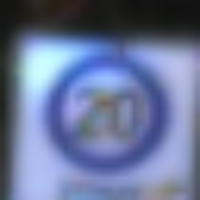

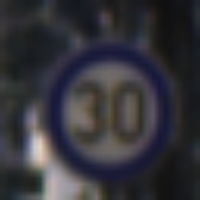

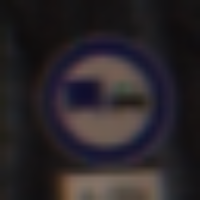

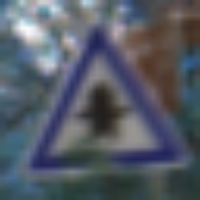

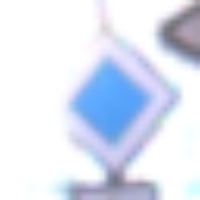

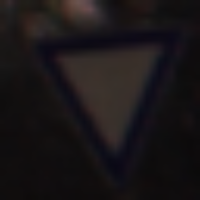

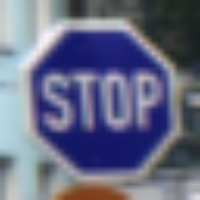

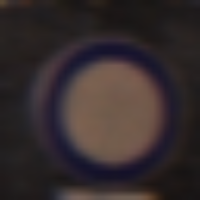

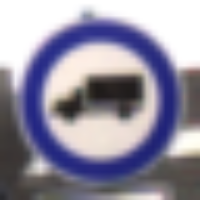

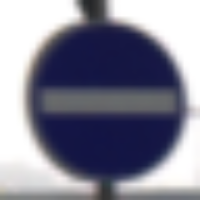

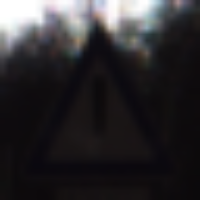

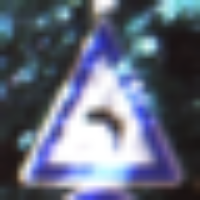

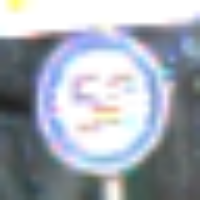

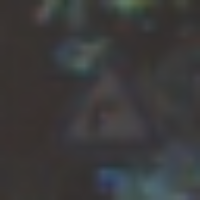

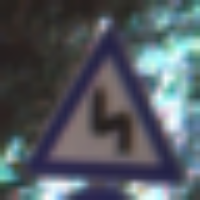

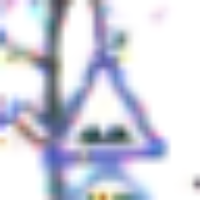

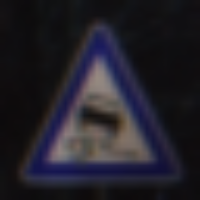

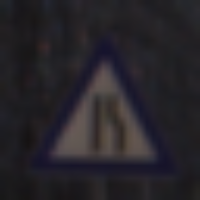

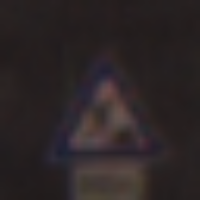

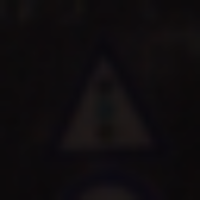

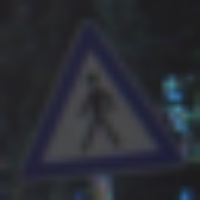

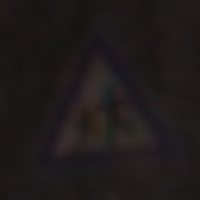

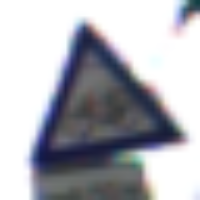

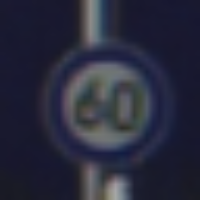

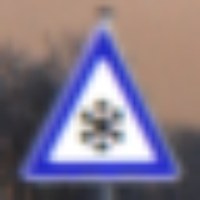

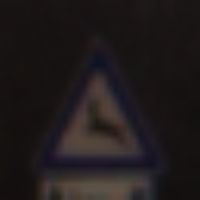

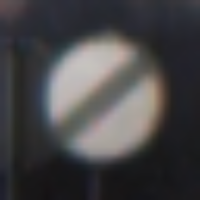

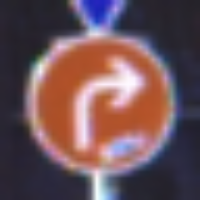

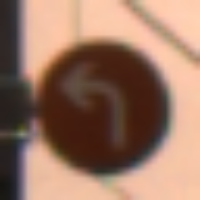

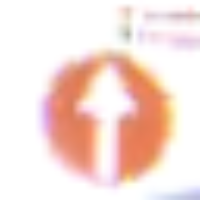

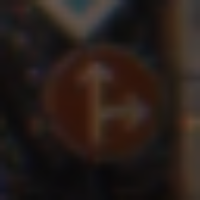

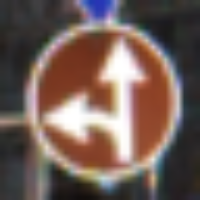

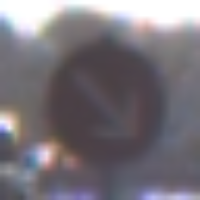

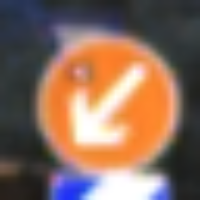

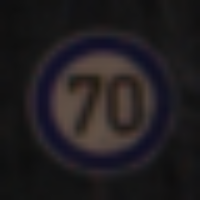

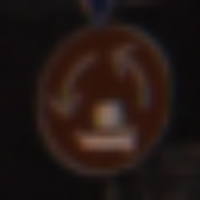

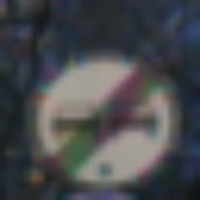

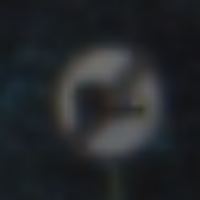

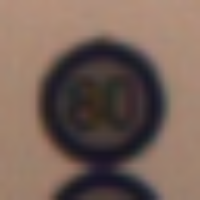

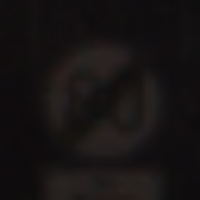

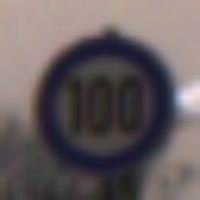

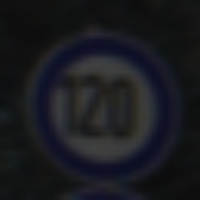

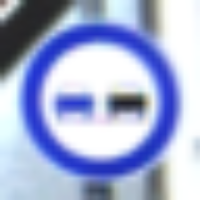

In [ ]:
import os
from google.colab.patches import cv2_imshow
import cv2

# Path to the root directory containing the folders
root_folder = "/content/extracted/Dataset"

# Desired size of the displayed image
desired_size = (200, 200)

# Loop through each folder (1, 2, 3, ..., 58)
for folder_name in sorted(os.listdir(root_folder)):
    folder_path = os.path.join(root_folder, folder_name)
    if os.path.isdir(folder_path):
        # Get the list of image files in the folder
        image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

        # Select the first image in the folder (if any)
        if image_files:
            # Construct the path to the first image in the folder
            image_path = os.path.join(folder_path, image_files[0])

            # Load the image
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, desired_size)

            # Display the resized image
            cv2_imshow(resized_image)


In [ ]:
path = "/content/extracted/Dataset"
labelFile = 'labels.csv'
'''
The batch size is the number of training examples utilized in one iteration.
It's a hyperparameter that determines how many samples are processed before the model's weights are updated
'''
batch_size_val=32
'''An epoch is a single pass through the entire training dataset.
 Setting the number of epochs determines how many times the model will see the entire dataset during training
'''
epochs_val=10
'''
imageDimesions:This variable specifies the dimensions of the input images.
For convolutional neural networks (CNNs), it's essential to have consistent input sizes.
Here, the images are expected to have dimensions of 32x32 pixels with 3 color channels (RGB)
'''
imageDimesions = (32,32,3)
#testRatio: This variable represents the ratio of the dataset that will be allocated for testing the trained model's performance
testRatio = 0.2
#validationRatio: Similar to the test ratio, this variable represents the ratio of the dataset used for validation during training
validationRatio = 0.2

count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  



This code splits the dataset into training and testing sets, followed by a further split of the training set into training and validation sets, allowing for model evaluation and validation during training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

This code prints the shapes of the training, validation, and testing sets, providing insight into the dimensions of the data used for training and evaluation.

In [ ]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [ ]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))


data shape  (58, 2) <class 'pandas.core.frame.DataFrame'>



This function converts a color image to grayscale using OpenCV's cvtColor function, which applies a color conversion from BGR to grayscale

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img



This function applies histogram equalization to the input grayscale image using OpenCV's equalizeHist function, enhancing the image's contrast and improving its overall appearance

In [ ]:
def equalize(img):
    img =cv2.equalizeHist(img)
    return img


Grayscaling (grayscale(img)):
The first step in the preprocessing function converts the input image from a color (RGB) image to a grayscale image. Grayscale images have only one color channel, representing intensity levels of light, rather than three channels for red, green, and blue. This reduction in complexity can decrease the computational load on the model and remove potentially distracting color information when color isn't a critical factor for the classification task.

Histogram Equalization (equalize(img)):
After converting the image to grayscale, histogram equalization is applied. This step improves the contrast of the image by spreading out the most frequent intensity values over the entire range of intensities available. For images, especially those captured under varying lighting conditions, histogram equalization can make features more distinguishable and thus easier for the model to learn.

Normalization (img / 255):
The final step is to normalize the pixel values of the image. Typically, pixel values are integers in the range [0, 255], representing the intensity of light. By dividing each pixel by 255, we scale these values to the range [0, 1]. Normalization helps in speeding up the convergence during the training of the neural network by ensuring that the input values are small and centered around 0. It makes the training process more stable and often results in faster convergence.

In [ ]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In this step it converts the resulting lists of preprocessed images into NumPy arrays using np.array(). This step is necessary to ensure that the data is in the correct format for training and evaluation by machine learning models

In [ ]:
num_of_samples = []
cols = 5
num_classes = noOfClasses

X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))




This block of code reshapes the image arrays in the training, validation, and testing sets to include an additional dimension, which is required for compatibility with convolutional neural network (CNN) models in Keras.

The dimensions are reshaped to (number_of_samples, image_height, image_width, channels), where:

number_of_samples is the number of images in each set.
image_height is the height of each image.
image_width is the width of each image.
channels is set to 1, indicating grayscale images. If the original images were in color (RGB), this value would typically be set to 3

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)





This code block sets up an ImageDataGenerator object from Keras, which is used for real-time data augmentation during model training.The ImageDataGenerator is initialized with parameters specifying various augmentation techniques, such as shifting width and height, zooming, shearing, and rotating images. These parameters control the range or degree of augmentation applied to the images

In [ ]:
dataGen= ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)




This block of code uses the to_categorical function from Keras to convert the class labels into one-hot encoded vectors, which are necessary for training a neural network for multi-class classification tasks.

This transformation ensures that the labels are in the appropriate format for training and evaluating a neural network model for multi-class classification. Each label becomes a vector, allowing the model to predict the probability distribution across all classes for each input image.







In [ ]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)




###convolutional neural network (CNN) architecture using Keras' Sequential API

In [ ]:
def myModel():
    model= Sequential()
    model.add((Conv2D(60,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(60, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add((Conv2D(30, (3,3),activation='relu')))
    model.add((Conv2D(30, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    #opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
'''
model = myModel()
print(model.summary())
#history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),
    steps_per_epoch=len(X_train) // 32,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=1
)
'''
model = myModel()



In [ ]:
# Compile the model with appropriate optimizer, loss, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

In [ ]:
# Now you can use the fit method
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),
    steps_per_epoch=len(X_train) // 32,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=1
)



Epoch 1/10
695/695 [==============================] - 228s 325ms/step - loss: 2.3579 - accuracy: 0.3383 - val_loss: 0.7077 - val_accuracy: 0.8292
Epoch 2/10
695/695 [==============================] - 216s 310ms/step - loss: 1.1407 - accuracy: 0.6467 - val_loss: 0.3035 - val_accuracy: 0.9192
Epoch 3/10
695/695 [==============================] - 216s 312ms/step - loss: 0.7720 - accuracy: 0.7566 - val_loss: 0.2156 - val_accuracy: 0.9402
Epoch 4/10
695/695 [==============================] - 227s 326ms/step - loss: 0.5935 - accuracy: 0.8137 - val_loss: 0.1113 - val_accuracy: 0.9662
Epoch 5/10
695/695 [==============================] - 217s 312ms/step - loss: 0.4962 - accuracy: 0.8430 - val_loss: 0.1107 - val_accuracy: 0.9673
Epoch 6/10
695/695 [==============================] - 228s 328ms/step - loss: 0.4236 - accuracy: 0.8660 - val_loss: 0.0673 - val_accuracy: 0.9824
Epoch 7/10
695/695 [==============================] - 228s 328ms/step - loss: 0.3686 - accuracy: 0.8852 - val_loss: 0.0952 -

This block of code visualizes the training and validation loss and accuracy over epochs and prints the test score and accuracy before saving the trained model

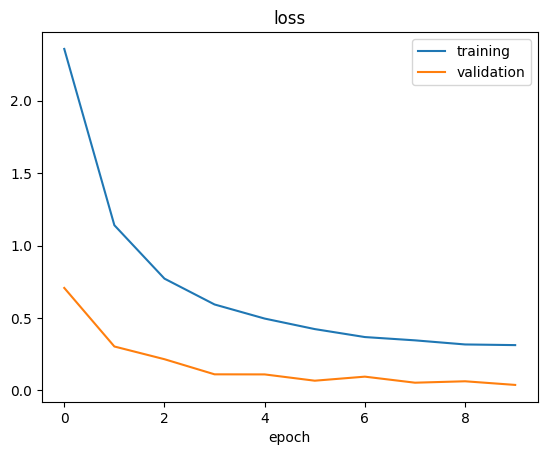

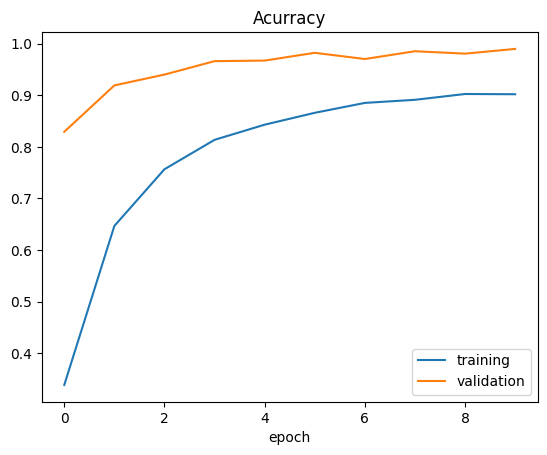

Test Score: 0.0341215655207634
Test Accuracy: 0.9906609058380127


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

model.save("model.h5")

In [ ]:
from __future__ import division, print_function
import sys
import os
import glob
import re
import numpy as np
import tensorflow as tf
import tensorflow as tf
import cv2

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow

from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename

app = Flask(__name__)

MODEL_PATH ='model.h5'

model = load_model(MODEL_PATH)

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'


def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    img = np.asarray(img)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2_imshow(img)
    img = img.reshape(1, 32, 32, 1)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = np.argmax(predictions)
    # probabilityValue =np.amax(predictions)
    preds = getClassName(classIndex)
    return preds

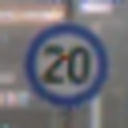

/content/extracted/Dataset/0/0_10000_1577671998.6491628.png


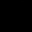

1/1 [==============================] - 0s 94ms/step


'Speed Limit 20 km/h'

In [ ]:
img = cv2.imread("/content/extracted/Dataset/0/0_10000_1577671998.6491628.png")
img = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)
model_predict('/content/extracted/Dataset/0/0_10000_1577671998.6491628.png',model)